In [79]:
import numpy as np
import matplotlib.pyplot as plot
import math

In [80]:
class currents:
    def I_sine(t):
        return 4 * (math.sin(t) + 0.9)

    def I_constant(t):
        return 10

    def I_step(t):
        if t > 20 and t <= 50:
            return 0
        return 5    

    def I_linear(t):
        return 10*t - 2.5  

    def I_polonomyal(t):
        return 2*(t**2) - 3*t + 5


Integrate And Fire

In [81]:
import numpy as np
import matplotlib.pyplot as plot
import math

class IF:
    def __init__(self, T, dt, tau, V_rest, R, V_threshold) :
        self.T = T
        self.dt = dt
        self.tau = tau
        self.V_rest = V_rest
        self.R = R
        self.V_threshold = V_threshold
        self.max_currents = {}

    def V_t(self, times, I):
        V = []
        V.append(self.V_rest)
        self.max_currents[I.__name__] = I(times[0])
        for i in range (1, len(times)):
            V.append(self.V_rest + (self.R * I(times[i]) * (1- math.e**((-1 * times[i])/self.tau))))


        return V   

    def plot(self, I):
        times = np.linspace(0, self.T, int(self.T/self.dt))
        plot.figure(figsize=(15, 10))
        plot.title('IF')
        plot.suptitle("R: " + str(self.R) + "tau: " + str(self.tau) +
                    "\ntotal time: " + str(self.T) +
                    "\nV_threshold: " + str(self.V_threshold) + "\nV_rest: " + str(self.V_rest) + "\nI: " + (str(I.__name__)), fontsize=12, ha = 'left', x=0.95, y=1)
        plot.plot(times, self.V_t(times, I), color='red')
        plot.title('IF')
        plot.xlabel('Time(t)')
        plot.ylabel('Potential(v)')
        plot.show()

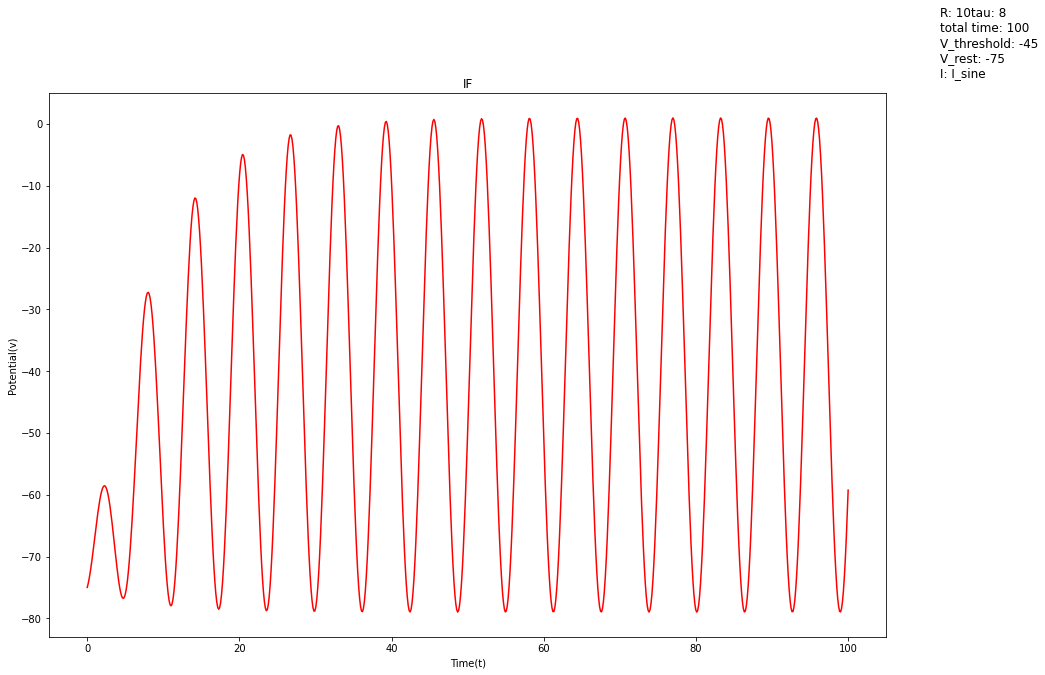

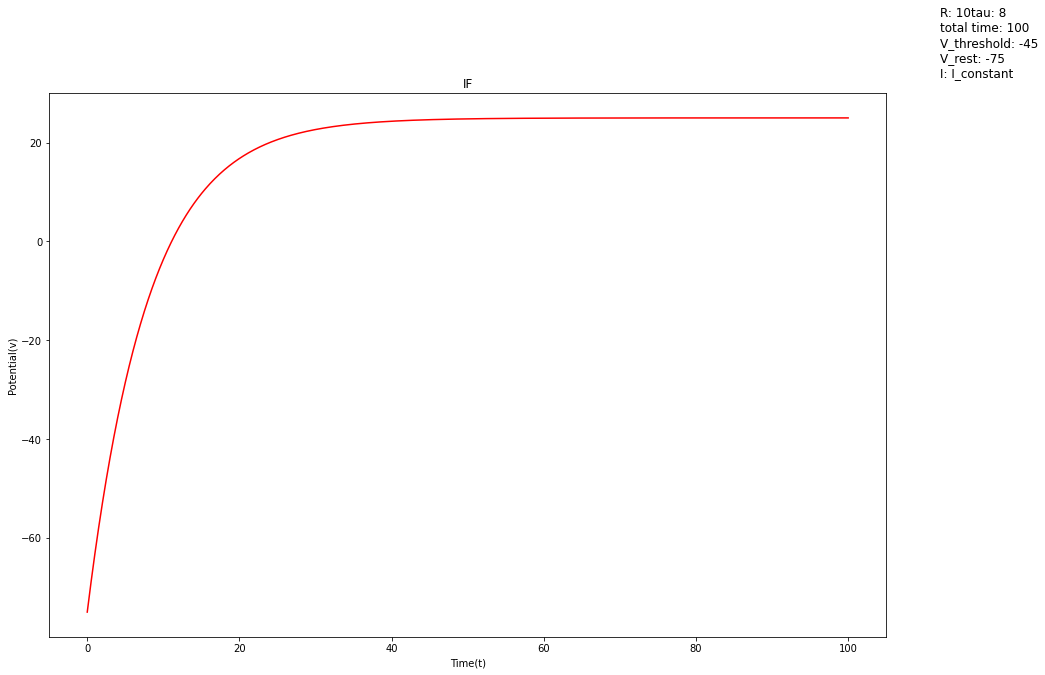

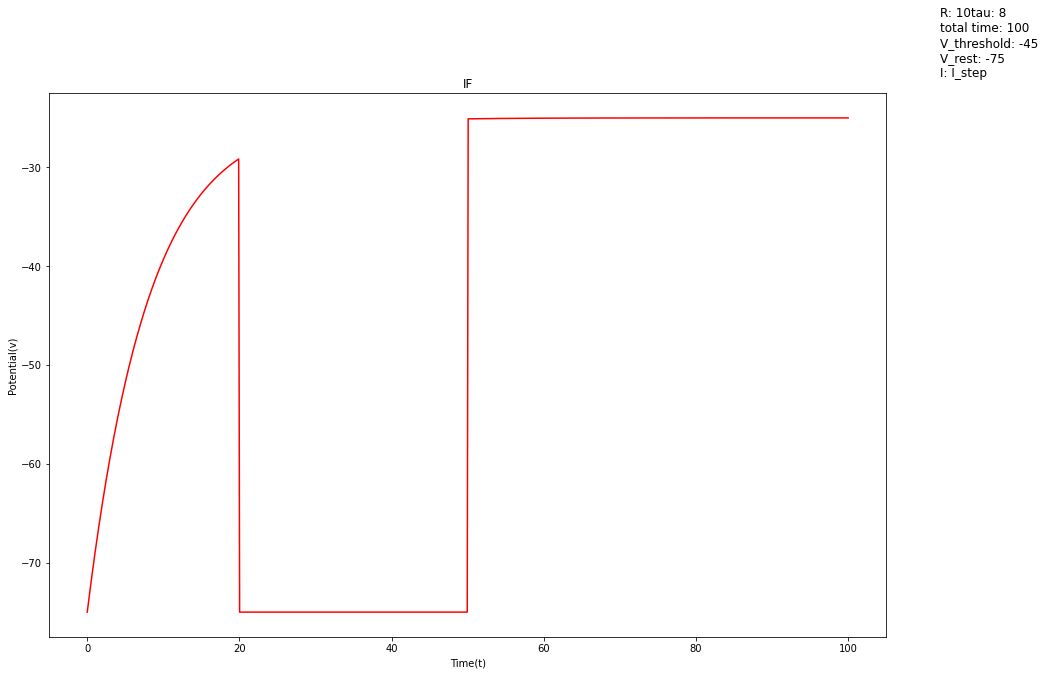

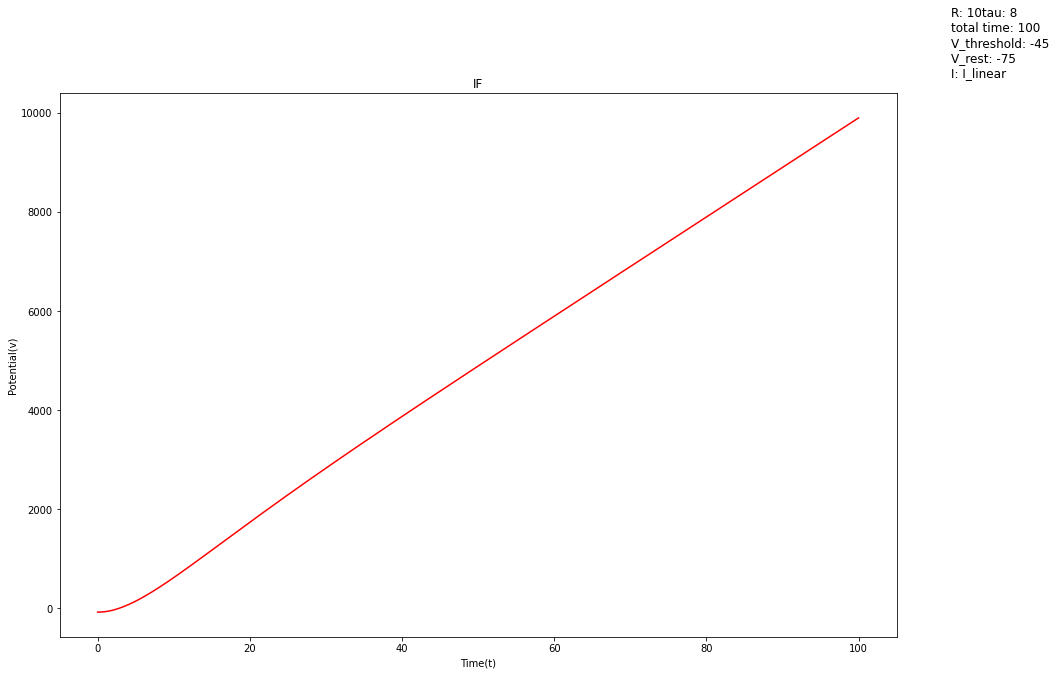

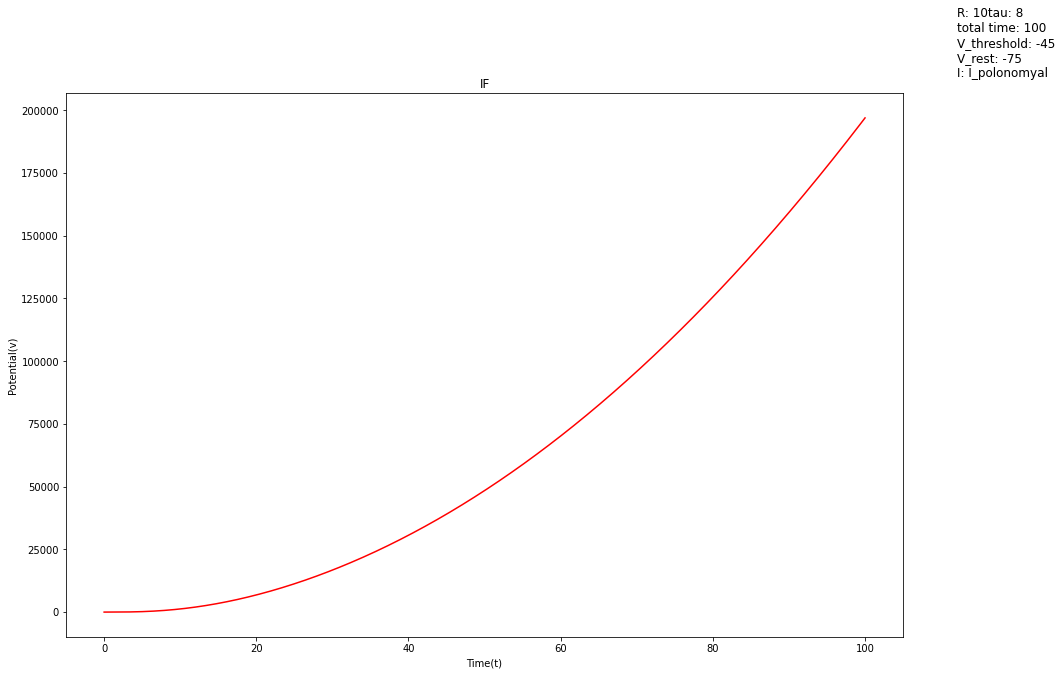

In [82]:
If = IF(100, 0.125, 8, -75, 10, -45)
If.plot(currents.I_sine)
If.plot(currents.I_constant)
If.plot(currents.I_step)
If.plot(currents.I_linear)
If.plot(currents.I_polonomyal)

Leaky Integrate And Fire

In [83]:
class LIF:
    def __init__(self, T, dt, tau, V_rest, R, V_threshold, V_spike) :
        self.T = T
        self.dt = dt
        self.tau = tau
        self.V_rest = V_rest
        self.R = R
        self.V_threshold = V_threshold
        self.V_spike = V_spike
        self.max_currents = {}

    def V_t(self, times, I):
        V=[]
        V.append(self.V_rest)
        self.max_currents[str(I.__name__)] = I(times[0])
        for i in range(1, len(times)):
            if I(times[i]) > self.max_currents[str(I.__name__)]:
                self.max_currents[str(I.__name__)] = I(times[i])
            V.append(((-1 * (V[i-1]- self.V_rest)) + (self.R * I(times[i])) * self.dt/self.tau)+ V[i-1])
            if V[i] >= self.V_threshold:
                    V[i] = self.V_rest
                    V[i-1] = self.V_spike
        return V            
        
        
    def plot(self, I):
        times = np.linspace(0, self.T, int(self.T/self.dt))
        plot.figure(figsize=(15, 10))
        plot.title('LIF')
        plot.suptitle("R: " + str(self.R) + "\ntotal time: " + str(self.T) + "\ndt: " + str(self.dt) +
                    "\nV_threshold: " + str(self.V_threshold) + "\nV_rest: " + str(self.V_rest) + "\nV_spike: " + str(self.V_spike) + 
                    "\nI: " + (str(I.__name__)), fontsize=12, ha = 'left', x=0.95, y=1)        
        plot.plot(times, self.V_t(times, I))
        plot.xlabel('Time(t)')
        plot.ylabel('Potential(v)')
        plot.show()           

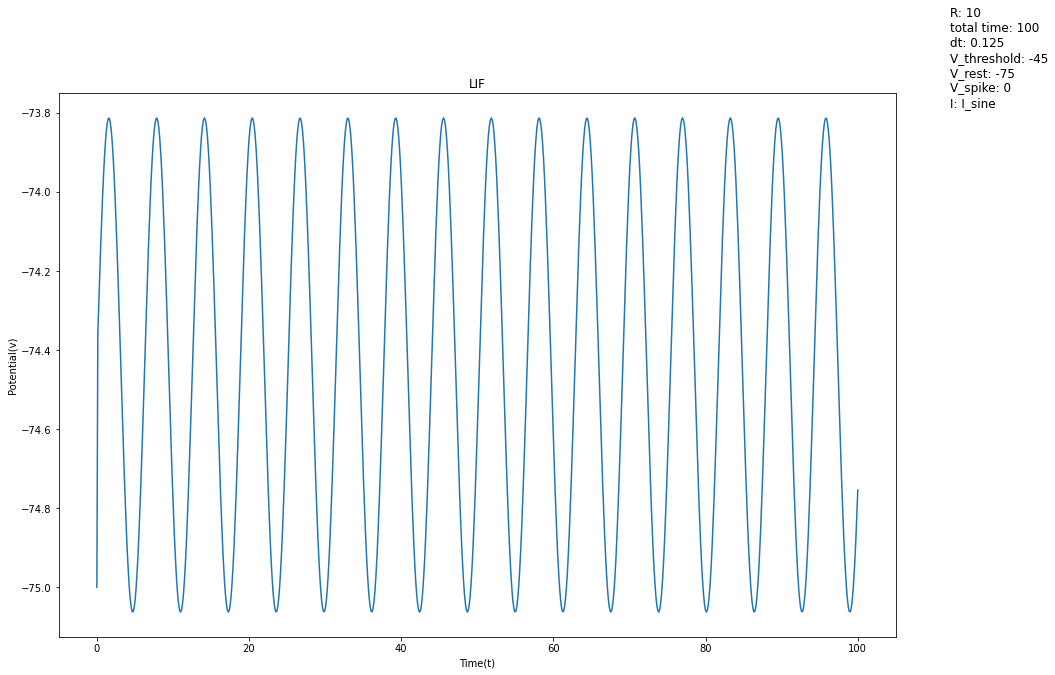

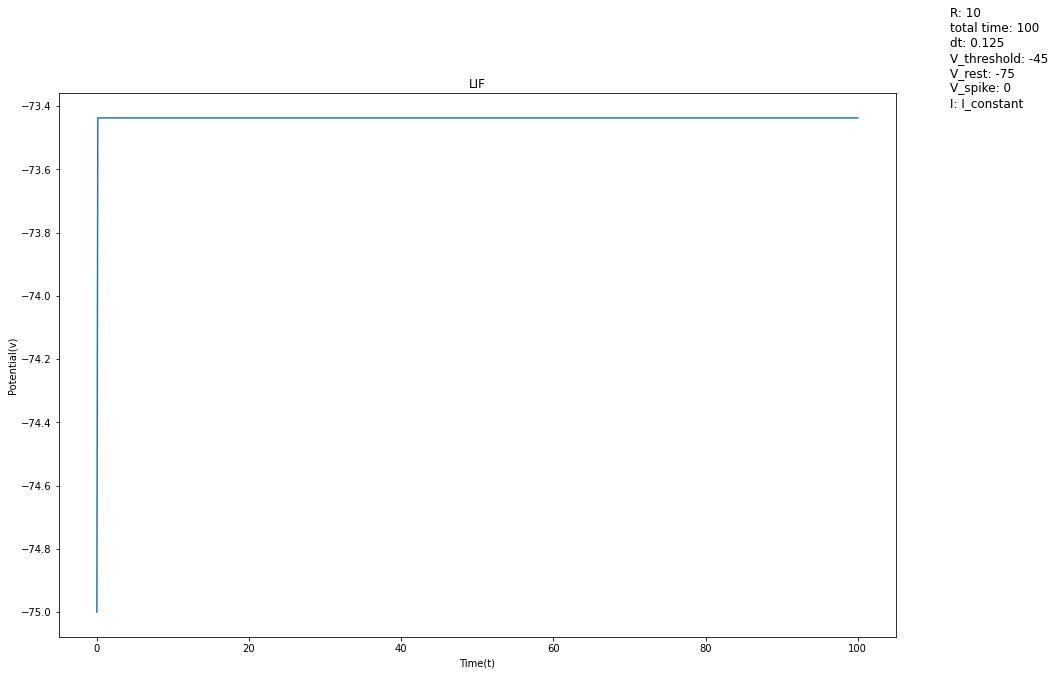

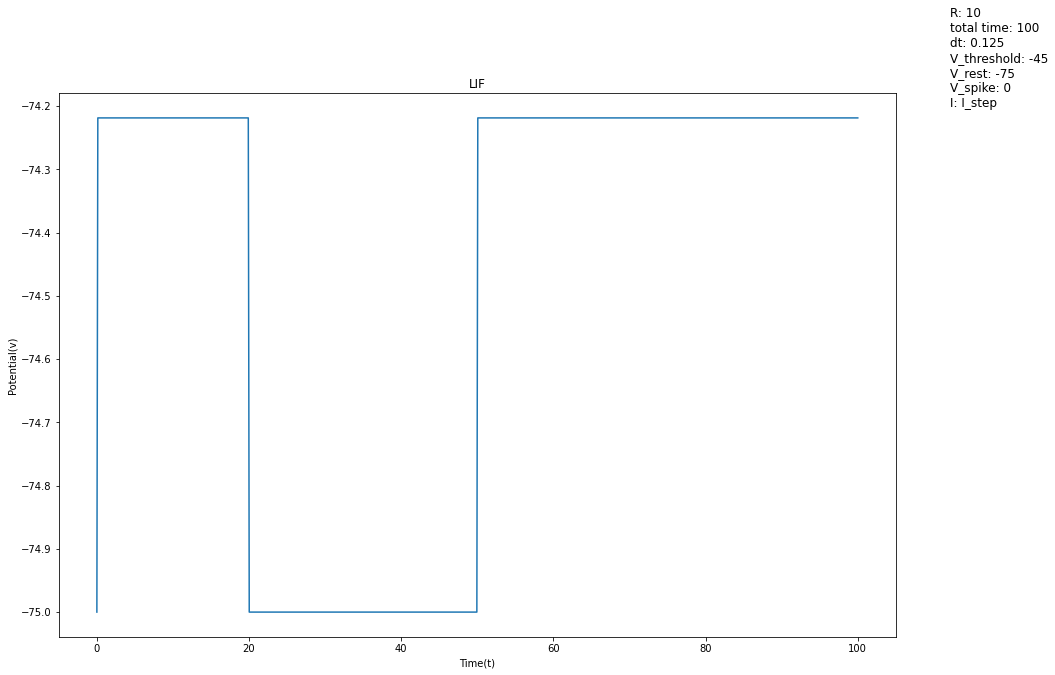

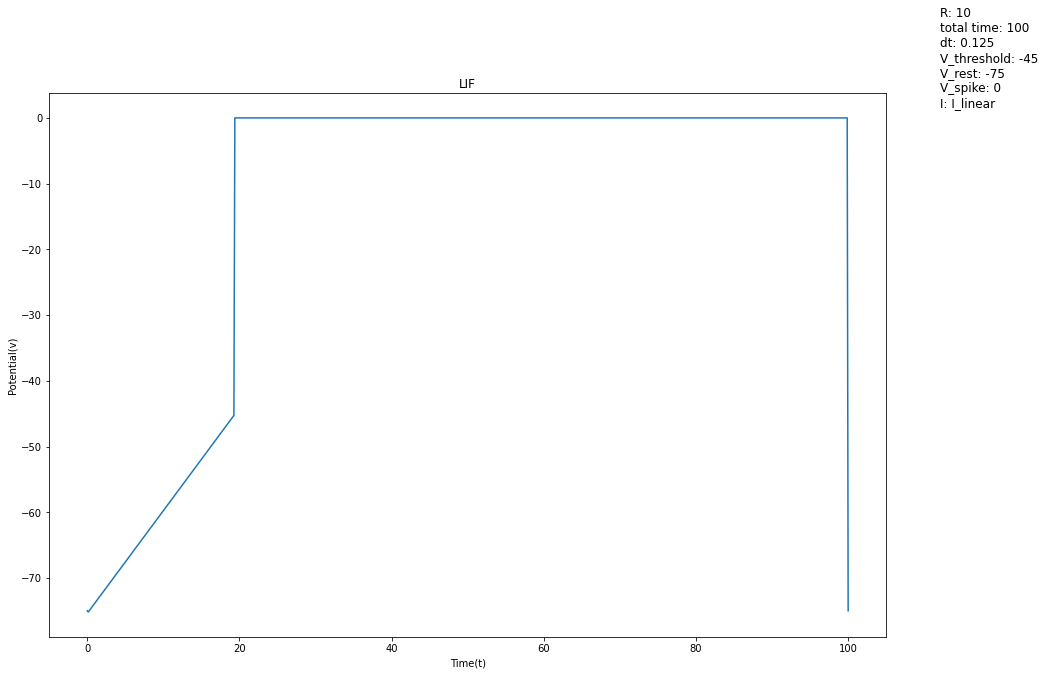

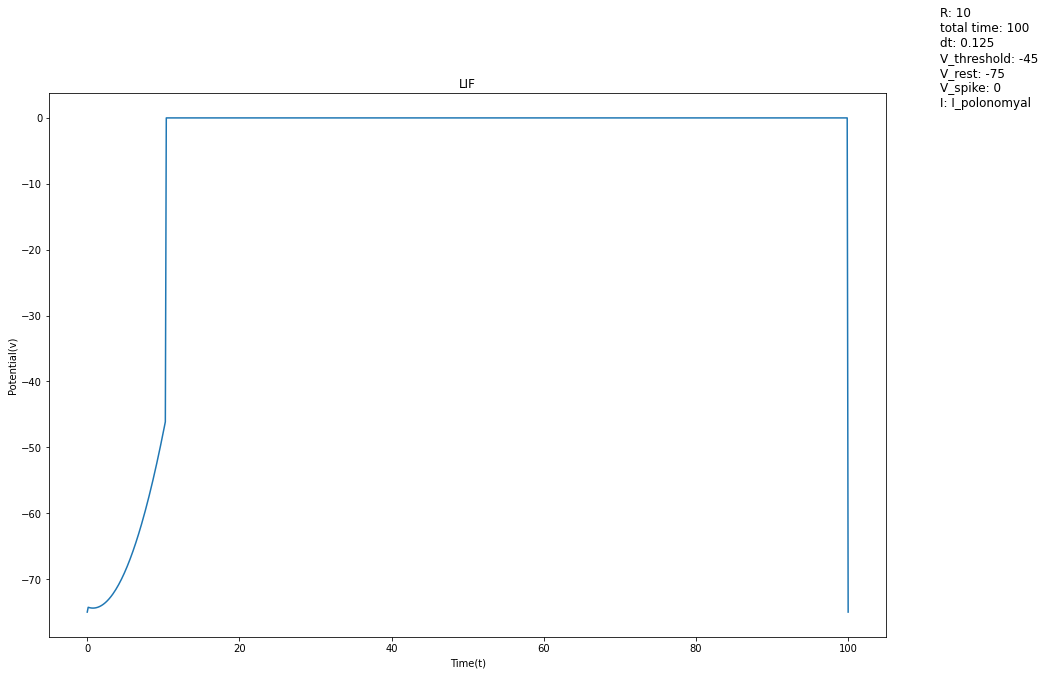

In [84]:
lif = LIF(100, 0.125, 8, -75, 10, -45, 0)
lif.plot(currents.I_sine)
lif.plot(currents.I_constant)
lif.plot(currents.I_step)
lif.plot(currents.I_linear)
lif.plot(currents.I_polonomyal)

Adaptive Leaky Integrate And Fire

In [85]:
class ALIF:
    def __init__(self, T, dt, tau_m, tau_k, V_rest, R, V_threshold, V_spike, a_k, b_k) :
        self.T = T
        self.dt = dt
        self.tau_m = tau_m
        self.tau_k = tau_k
        self.V_rest = V_rest
        self.R = R
        self.V_threshold = V_threshold
        self.V_spike = V_spike
        self.a_k = a_k
        self.b_k = b_k

    def V_t(self, times, I):
        V = []
        V.append(self.V_rest)
        W = []
        W.append(0)
        spikes = []
        for i in range(1, len(times)):
            sigma = 0
            V.append(((-1 * (V[i-1]- self.V_rest)) - (self.R * W[i-1]) + (self.R * I(times[i])) * self.dt/self.tau_m)+ V[i-1])
            if V[i] >= self.V_threshold:
                    spikes.append(times[i])
                    V[i] = self.V_rest
                    V[i-1] = self.V_spike
                    sigma = 1
            W.append((self.a_k * (V[i-1] - self.V_rest)) - W[i-1] + (self.b_k * self.tau_k * sigma) * self.dt/self.tau_k + W[i-1]) 
        return V  

    def plot(self, I):
        times = np.linspace(0, self.T, int(self.T/self.dt))
        plot.figure(figsize=(15, 10))
        plot.title('ALIF')
        plot.suptitle("R: " + str(self.R) +  "\ntau_m: " + str(self.tau_m) +  "\ntau_k: " + str(self.tau_k) +  
                    "\ntotal time: " + str(self.T) + "\ndt: " + str(self.dt) +
                    "\nV_threshold: " + str(self.V_threshold) + "\nV_rest: " + str(self.V_rest) + "\nV_spike: " + str(self.V_spike) + 
                    "\nI: " + (str(I.__name__)) +"\na_k: " + str(self.a_k) +"\nb_k: " + str(self.b_k), fontsize=12, ha = 'left', x=0.95, y=1)
        plot.plot(times, self.V_t(times, I), color = 'black')
        plot.xlabel('Time(t)')
        plot.ylabel('Potential(v)')
        plot.show() 
    

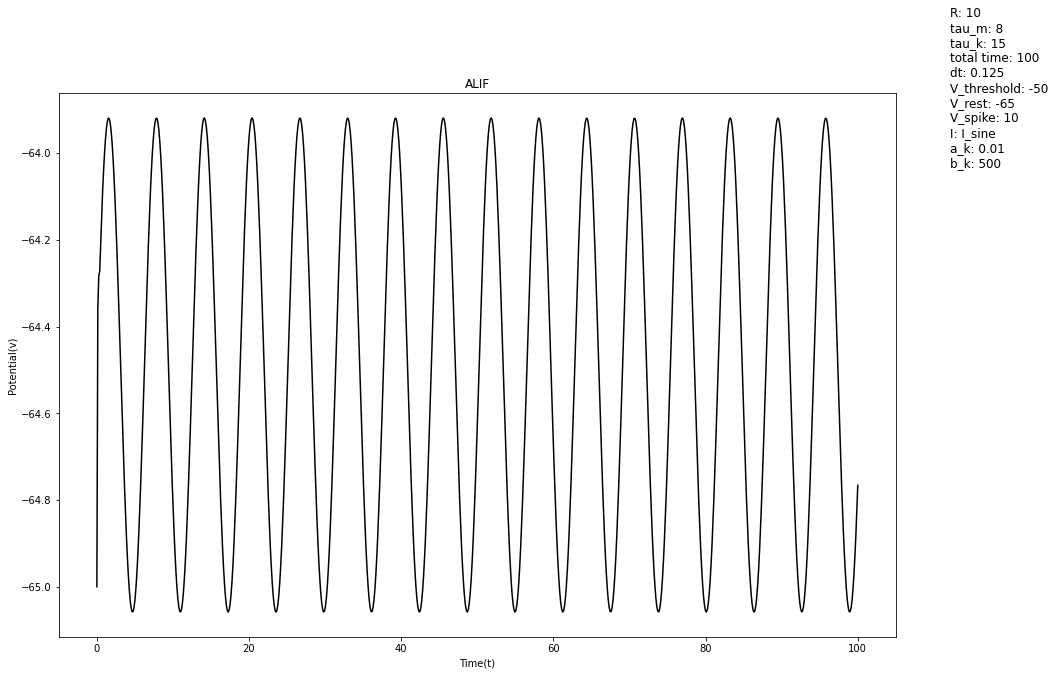

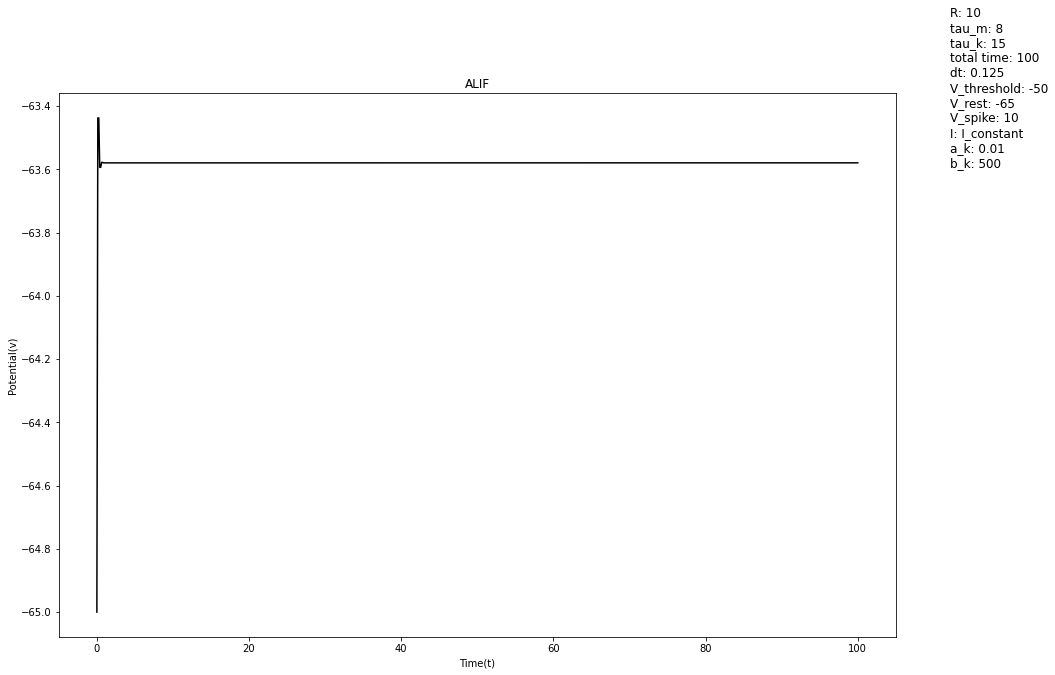

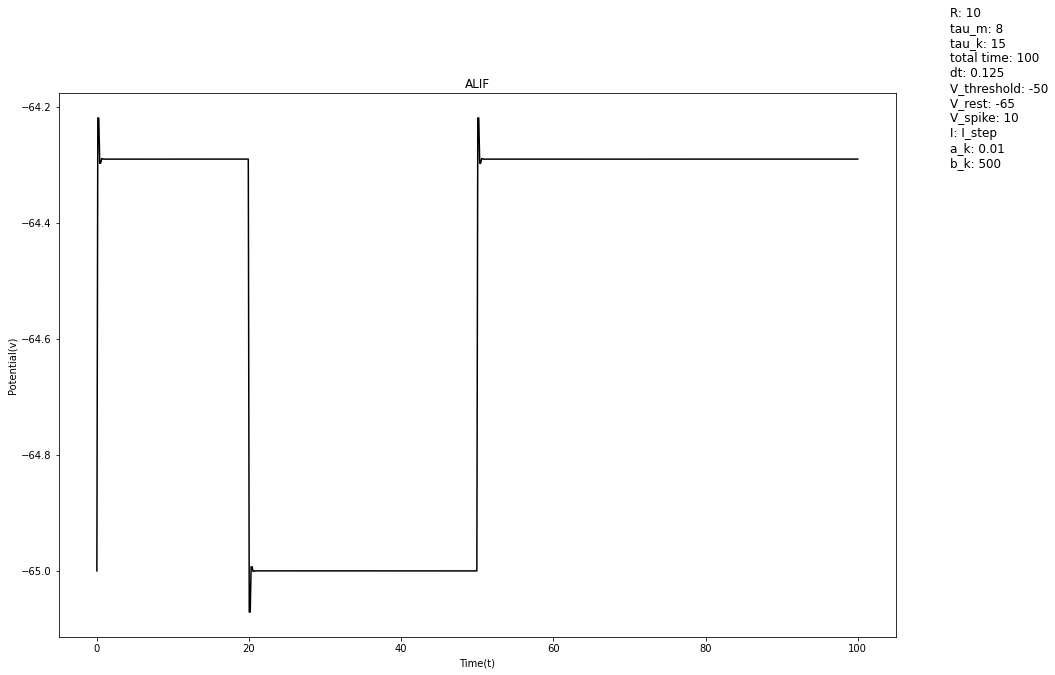

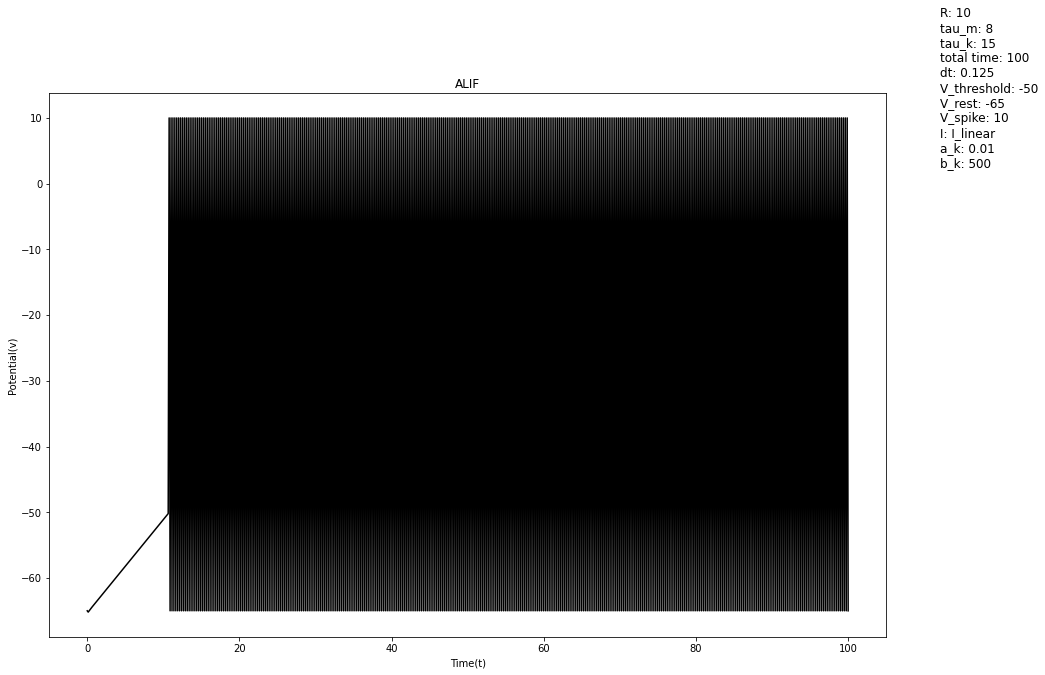

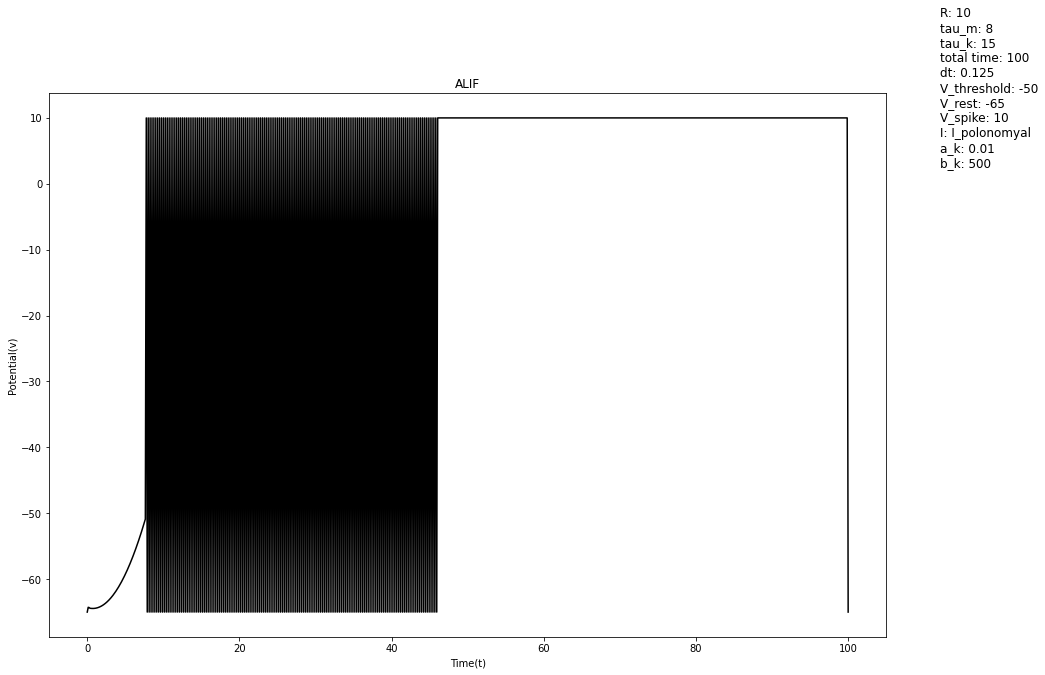

In [86]:
alif = ALIF(100, 0.125, 8, 15, -65, 10, -50, 10, 0.01, 500)
alif.plot(currents.I_sine)
alif.plot(currents.I_constant)
alif.plot(currents.I_step)
alif.plot(currents.I_linear)
alif.plot(currents.I_polonomyal)

Adaptive Exponential Leaky Integrate And Fire

In [87]:
class AELIF:
    def __init__(self, T, dt, tau_m, tau_k, V_rest, R, V_threshold, V_spike, a_k, b_k, V_rh, DELTA_t) :
        self.T = T
        self.dt = dt
        self.tau_m = tau_m
        self.tau_k = tau_k
        self.V_rest = V_rest
        self.R = R
        self.V_threshold = V_threshold
        self.V_spike = V_spike
        self.a_k = a_k
        self.b_k = b_k
        self.V_rh = V_rh
        self.DELTA_t = DELTA_t

    def V_t(self, times, I):
        V = []
        W = []
        V.append(self.V_rest)
        W.append(0)
        for i in range(1, len(times)):
            sigma = 0
            V.append(((-1 * (V[i-1]- self.V_rest)) + (self.DELTA_t * math.exp((V[i-1] - self.V_rh) / self.DELTA_t)) - (self.R * W[i-1]) + (self.R * I(times[i])) * self.dt/self.tau_m)+ V[i-1])
            if V[i] >= self.V_threshold:
                    V[i] = self.V_rest
                    V[i-1] = self.V_spike
                    sigma = 1
            W.append((self.a_k * (V[i-1] - self.V_rest)) - W[i-1] + (self.b_k * self.tau_k * sigma) * self.dt/self.tau_k + W[i-1]) 
        return V  


    def F_I(self, times, I):
        V = []
        V.append(self.V_rest)
        W = self.W_t(times, I)
        for i in range(1, len(times)):
            V.append(((-1 * (V[i-1]- self.V_rest)) + (self.DELTA_t * math.exp((V[i-1] - self.V_rh) / self.DELTA_t)) - (self.R * W[i-1]) + (self.R * I(times[i])) * self.dt/self.tau_m)+ V[i-1])
            if V[i] >= self.V_threshold:
                    V[i] = self.V_rest
                    V[i-1] = self.V_spike
        return V  

    def plot(self, I):
        times = np.linspace(0, self.T, int(self.T/self.dt))
        plot.figure(figsize=(15, 10))
        plot.title('AELIF')
        plot.suptitle("R: " + str(self.R) +  "\ntau_m: " + str(self.tau_m) +  "\ntau_k: " + str(self.tau_k) +  
                    "\ntotal time: " + str(self.T) + "\ndt: " + str(self.dt) +
                    "\nV_threshold: " + str(self.V_threshold) + "\nV_rest: " + str(self.V_rest) + "\nV_spike: " + str(self.V_spike) + 
                    "\nI: " + (str(I.__name__)) +"\na_k: " + str(self.a_k) +"\nb_k: " + str(self.b_k) +
                    "\nV_rh: " + str(self.V_rh) + "\nDELTA_T: " + str(self.DELTA_t), fontsize=12, ha = 'left', x=0.95, y=1)
        plot.plot(times, self.V_t(times, I), color = 'g')
        plot.xlabel('Time(t)')
        plot.ylabel('Potential(v)')
        plot.show() 
    

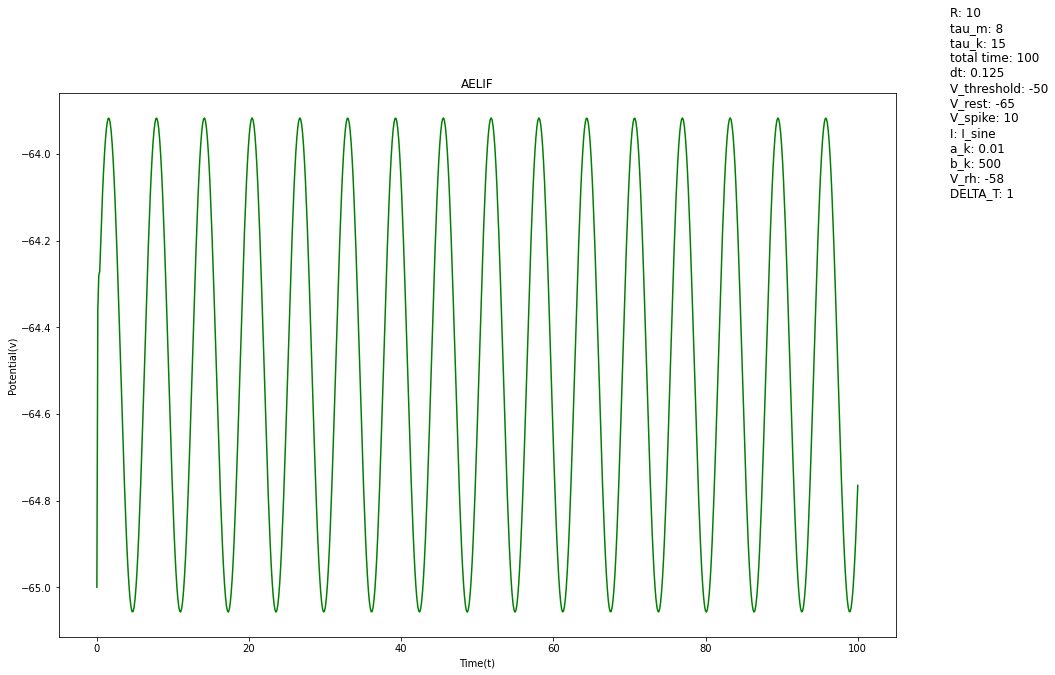

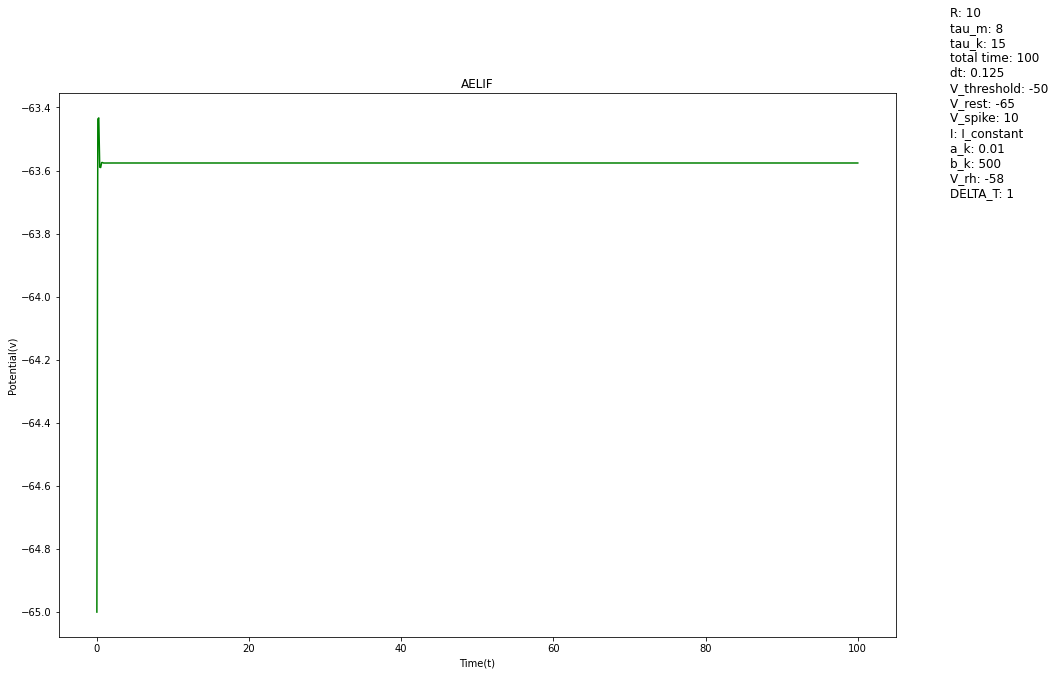

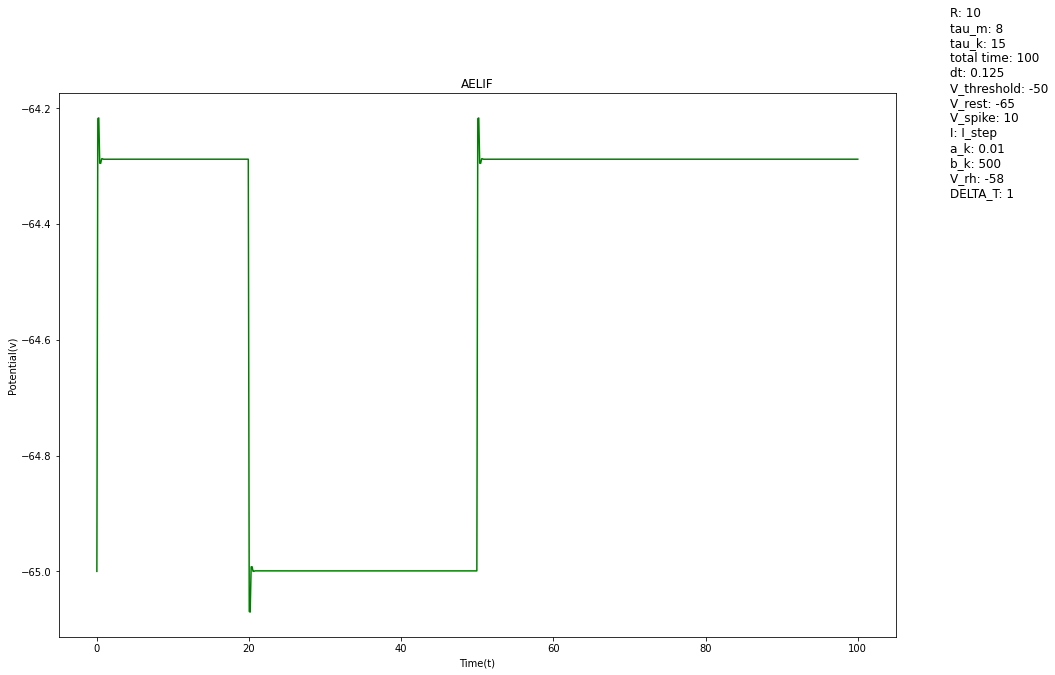

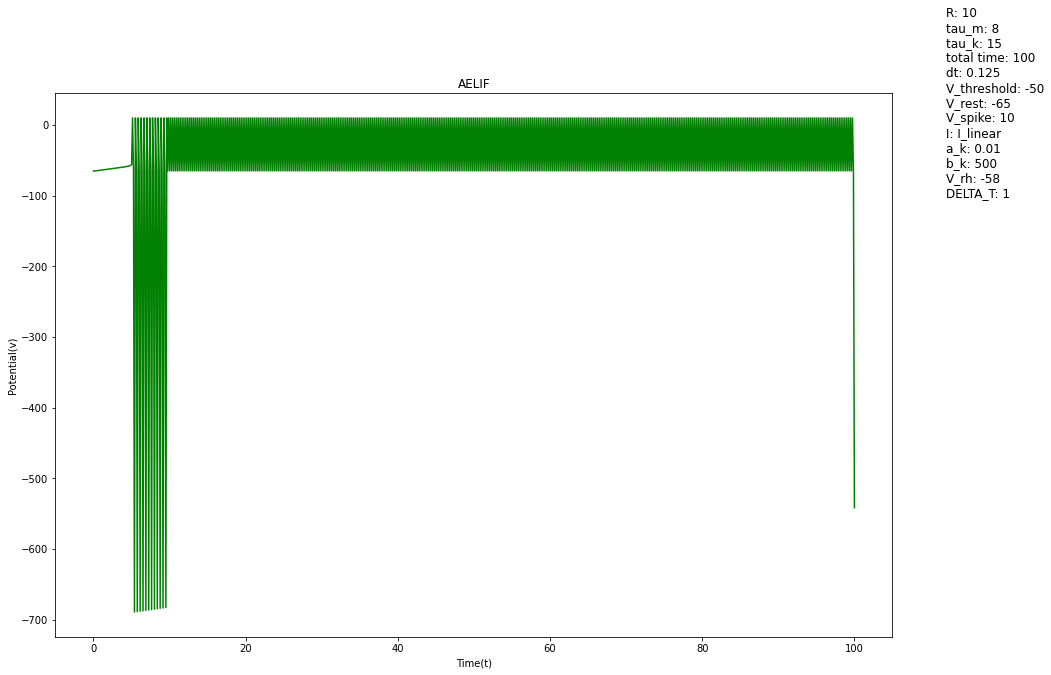

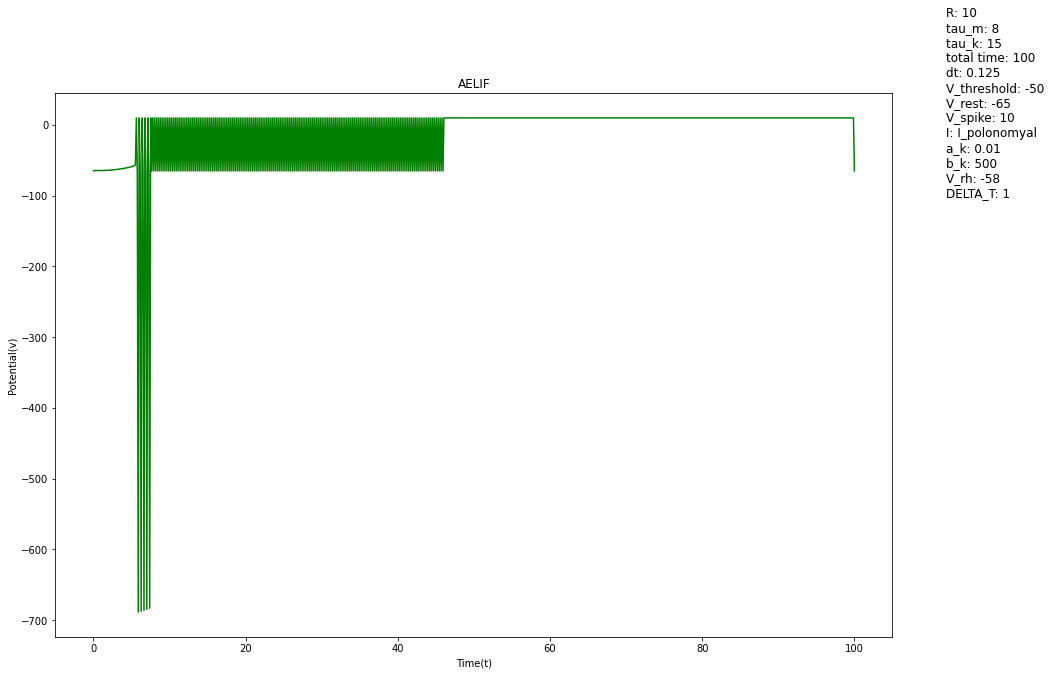

In [88]:
aelif = AELIF(100, 0.125, 8, 15, -65, 10, -50, 10, 0.01, 500, -58, 1)
aelif.plot(currents.I_sine)
aelif.plot(currents.I_constant)
aelif.plot(currents.I_step)
aelif.plot(currents.I_linear)
aelif.plot(currents.I_polonomyal)
